<a href="https://colab.research.google.com/github/mandar-solanki/GAN-exercises/blob/main/GAN_1017_exercise_v0_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
# Loading Github Repo
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd gdrive/My Drive/project_folder/AI-Fundamentals-Updated
! git pull


Mounted at /content/gdrive
/content/gdrive/My Drive/project_folder/AI-Fundamentals-Updated
Already up to date.


10/16

In [2]:
! unzip /content/safari.zip -d /content/safari


Archive:  /content/safari.zip
   creating: /content/safari/safari/test/
  inflating: /content/safari/safari/test/elephant.jpg  
  inflating: /content/safari/safari/test/giraffe.jpg  
  inflating: /content/safari/safari/test/lion.jpg  
  inflating: /content/safari/safari/test/zebra.jpg  
   creating: /content/safari/safari/training/
   creating: /content/safari/safari/training/elephant/
  inflating: /content/safari/safari/training/elephant/1.jpg  
  inflating: /content/safari/safari/training/elephant/10.jpg  
  inflating: /content/safari/safari/training/elephant/11.jpg  
  inflating: /content/safari/safari/training/elephant/12.jpg  
  inflating: /content/safari/safari/training/elephant/13.jpg  
  inflating: /content/safari/safari/training/elephant/14.jpg  
  inflating: /content/safari/safari/training/elephant/15.jpg  
  inflating: /content/safari/safari/training/elephant/16.jpg  
  inflating: /content/safari/safari/training/elephant/17.jpg  
  inflating: /content/safari/safari/training/

## Tensorflow Deep Nueral Network Design Challenge with safari Dataset

In [3]:
import tensorflow
from tensorflow import keras
print('TensorFlow version:',tensorflow.__version__)

TensorFlow version: 2.17.0


In [4]:
import os
data_folder = '/content/safari/safari/training'

In [5]:
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


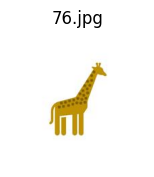

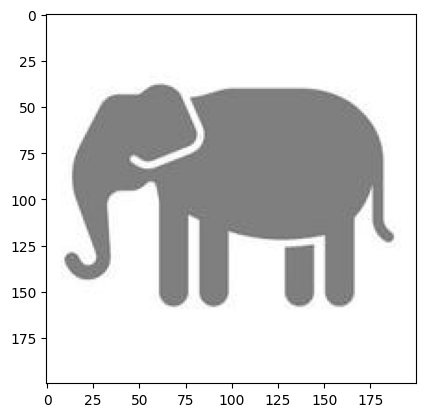

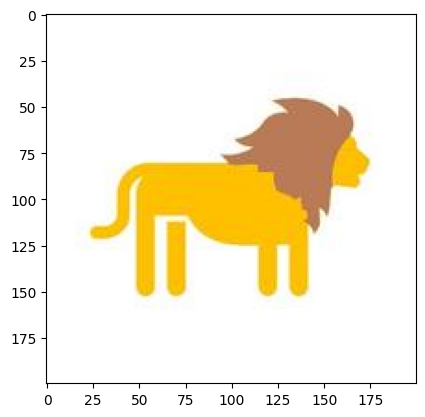

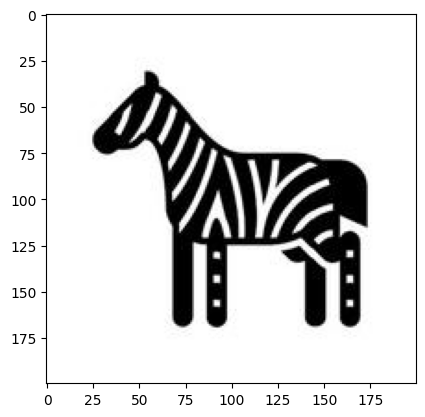

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(8,12))
i=0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder, sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a = fig.add_subplot(1, len(classes), 1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
    plt.show()
#plt.show()


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (200, 200)
batch_size = 30

datagen = ImageDataGenerator(rescale=1./255,
                             validation_split = 0.25)

print("Training Dataset")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

print("Validation Dataset")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

classnames = list(train_generator.class_indices.keys())
print('Data Generators ready')


Training Dataset
Found 300 images belonging to 4 classes.
Validation Dataset
Found 96 images belonging to 4 classes.
Data Generators ready


In [8]:
#Define CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(24,(6,6), input_shape=train_generator.image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(24,(6,6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(24,(6,6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 195, 195, 24)        │           2,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 97, 97, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 92, 92, 24)          │          20,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 46, 46, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 24)          │          20,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │          38,404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,540 (322.42 KB)

 Trainable params: 82,540 (322.42 KB)

 Non-trainable params: 0 (0.00 B)

None


10/17

In [9]:
#Model Training

num_epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=num_epochs
)



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.2906 - loss: 1.4049 - val_accuracy: 0.3444 - val_loss: 1.0639
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1667 - val_loss: 1.2237
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.5173 - loss: 0.9593 - val_accuracy: 0.7556 - val_loss: 0.6077
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.6936
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8496 - loss: 0.4075 - val_accuracy: 1.0000 - val_loss: 0.0454
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2198
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.9877 - loss: 0.0512 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 1.0000 - loss: 0.0052 - val_a

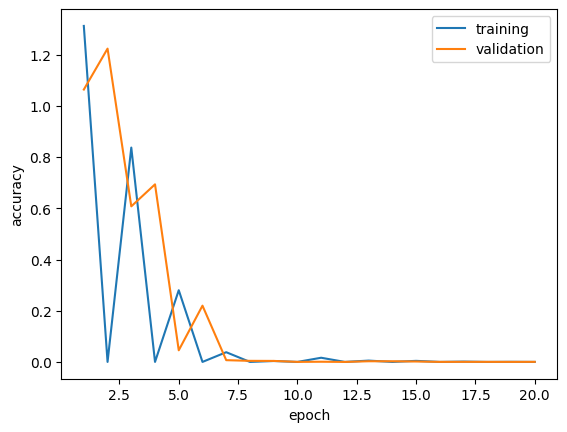

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()


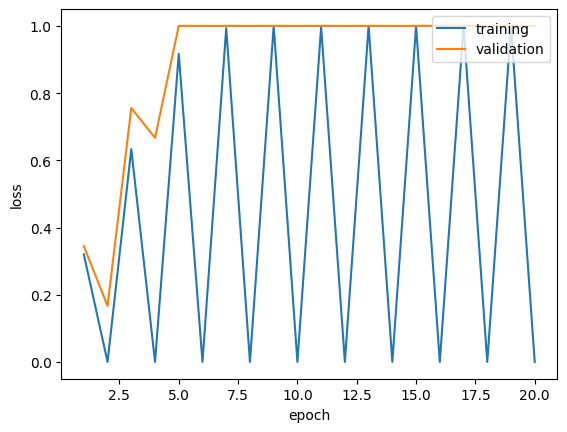

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [20]:
#Evaluate Model Performance

Generating predictions from validation data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step


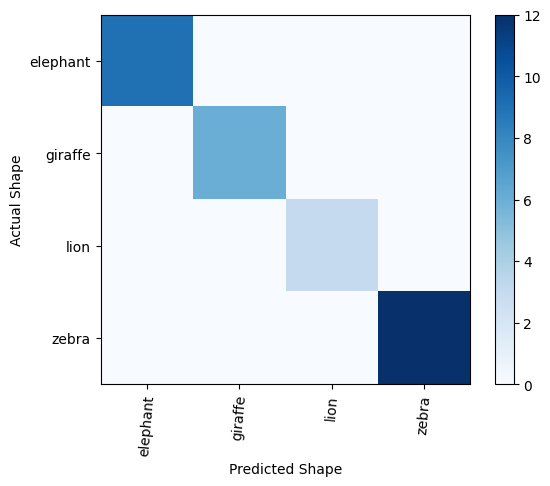

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()
